In [1]:
import os
import pathlib
import re
import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output, State
from data_processing import scaler
#import cufflinks as cf

app = dash.Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1.0"}],)
server = app.server

#Load data
vets = pd.read_csv('data/merged_df_dash.csv')
branches = vets['Branch'].unique()[:4]
map_df = vets[vets['scaled'].notnull()]
bubble_sizes = scaler(map_df['scaled'], 4, 30)

#Step 4. Create figure
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = map_df['longitude'],
        lat = map_df['latitude'],
        text = map_df['text'],
        mode = 'markers',
        hoverinfo='text',
        marker = dict(
            size = bubble_sizes,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.5,
                color='rgb(40,40,40)'
            ),
            colorscale = 'portland',
            cmin = 0,
            color = map_df['Combined'],
            cmax = map_df['Combined'].max(),
            colorbar_title="# of Members"
        )))

fig.update_layout(
        title = 'Elite Meet National Distribution',
        title_font_family='Garamond',
        title_font_size=40,
        title_x=0.5,
        title_y=0.9,
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(217, 217, 217)",
        )
    )

app.layout = html.Div(
    id="root",
    children=[
        html.Div(
            id="header",
            children=[
                html.H1(children="Elite Meet National Distribution", style={'fontfamily':'Garamond'}),
                html.H2(
                    id="description",
                    children="Distribution of Elite Meet members based on Branch or Tribe affiliation",
                ),
            ],
        ),
        html.Div(
            id="app-container",
            children=[
                html.Div(
                    id="left-column",
                    children=[
                        html.Div(
                            id="branch-drop-down",
                            children=[
                                html.P(
                                    id="bdd-text",
                                    children="Service Branch",
                                ),
                                dcc.Dropdown(
                                    id='Branches',
                                    options=[{'label':branch, 'value':branch} for branch in branches],
                                    value=branches,
                                    # allows user to select multiple drop down options
                                    multi=True,
                                    # allows the user to remove all options
                                    clearable=True,
                                    style={'width': 200}),
                            ],
                        ),
                        html.Div(
                            id="map-container",
                            children=[
                                html.P(
                                    "Elite Meet National Distribution: Total {}".format(len(map_df)),
                                    id="map-title",
                                ),
                                dcc.Graph(
                                    id="em_dist",
                                    figure=fig,
                                    style={"height": 650}),
                                    #dict(
                                      #  layout=dict(
                                      #      autosize=True,),
                            ],
                        ),
                    ],
                )])
            ])

#if __name__ == "__main__":
 #   app.run_server(debug=True)

ModuleNotFoundError: No module named 'data_processing'

In [16]:
top_hits = vets['How_did_you_hear_about_Elite_Meet'].value_counts()[vets['How_did_you_hear_about_Elite_Meet'].value_counts() > 2].index

In [17]:
df_top_hits = vets[vets['How_did_you_hear_about_Elite_Meet'].isin(top_hits)]

In [18]:
df_top_hits['How_did_you_hear_about_Elite_Meet'].value_counts()

Friend                       135
LinkedIn                      77
Co-worker                     71
Colleague                     39
Elite Meet member             36
John Allen                    13
Colleague - Transitioning      9
The Honor Foundation           8
Instagram                      8
Family                         7
Web search                     7
Ed Hine                        5
Garrett Harrell                4
Navy SEAL Foundation           4
Word of mouth                  4
LinkedIn - John Allen          4
SFL-TAP                        3
Networking                     3
Name: How_did_you_hear_about_Elite_Meet, dtype: int64

In [19]:
def slicer(df, tribe):
    newdf = df[df['Tribe'] == tribe]
    length = len(newdf)
    marketing = newdf['How_did_you_hear_about_Elite_Meet'].value_counts()/length * 100
    return marketing

In [51]:
tag = df_top_hits.groupby(['Tribe','How_did_you_hear_about_Elite_Meet'])['Tribe'].count().unstack()
tag.style.background_gradient(cmap ='magma').set_properties(**{'font-size': '20px'}).set_precision(2)

How_did_you_hear_about_Elite_Meet,Co-worker,Colleague,Colleague - Transitioning,Ed Hine,Elite Meet member,Family,Friend,Garrett Harrell,Instagram,John Allen,LinkedIn,LinkedIn - John Allen,Navy SEAL Foundation,Networking,SFL-TAP,The Honor Foundation,Web search,Word of mouth
Tribe,,,,,,,,,,,,,,,,,,
CCT,nan,2.00,nan,nan,nan,nan,4.00,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
Civil Affairs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
EOD,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
Green Beret,11.00,16.00,3.00,nan,3.00,1.00,43.00,nan,5.00,nan,20.00,nan,nan,1.00,1.00,nan,2.00,2.00
Helo Pilot,5.00,1.00,nan,nan,6.00,1.00,4.00,nan,nan,1.00,6.00,nan,nan,nan,nan,nan,nan,nan
NEOD,4.00,3.00,nan,nan,4.00,nan,12.00,nan,nan,1.00,1.00,nan,nan,nan,nan,1.00,1.00,nan
PJ,nan,1.00,nan,nan,nan,nan,3.00,nan,1.00,nan,2.00,nan,nan,nan,nan,1.00,nan,nan
PSYOPS,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4.00,nan,nan,nan,nan,nan,nan,nan
Pilot,3.00,7.00,nan,4.00,7.00,2.00,22.00,nan,nan,nan,20.00,2.00,1.00,1.00,nan,nan,1.00,nan


In [55]:
pd.pivot_table(df_top_hits,index='Tribe',
                                    aggfunc='count',
                                    values='How_did_you_hear_about_Elite_Meet',
                                    margins=True)

,How_did_you_hear_about_Elite_Meet
Tribe,
CCT,7
Civil Affairs,1
EOD,2
Green Beret,108
Helo Pilot,24
NEOD,27
PJ,8
PSYOPS,4
Pilot,70


In [89]:
marketing = df_top_hits.groupby(['Tribe','How_did_you_hear_about_Elite_Meet'])['Tribe'].count().unstack()

In [90]:
marketing_pcts = marketing.T.apply(lambda x: 100*x/x.sum()).fillna(0)
marketing_pcts.style.background_gradient(cmap ='magma').set_properties(**{'font-size': '20px'}).set_precision(1)

Tribe,CCT,Civil Affairs,EOD,Green Beret,Helo Pilot,NEOD,PJ,PSYOPS,Pilot,Raider,Ranger,Recon,SEAL,SOWT,SWCC
How_did_you_hear_about_Elite_Meet,,,,,,,,,,,,,,,
Co-worker,0.0,0.0,0.0,10.2,20.8,14.8,0.0,0.0,4.3,9.4,13.5,20.0,32.9,0.0,41.2
Colleague,28.6,0.0,0.0,14.8,4.2,11.1,12.5,0.0,10.0,3.1,13.5,0.0,1.3,0.0,5.9
Colleague - Transitioning,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,12.5,0.0,0.0,1.3,0.0,2.9
Ed Hine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,0.0,0.0,0.0,1.3,0.0,0.0
Elite Meet member,0.0,0.0,0.0,2.8,25.0,14.8,0.0,0.0,10.0,12.5,5.4,0.0,1.3,0.0,26.5
Family,0.0,0.0,0.0,0.9,4.2,0.0,0.0,0.0,2.9,0.0,8.1,0.0,0.0,0.0,0.0
Friend,57.1,0.0,50.0,39.8,16.7,44.4,37.5,0.0,31.4,21.9,43.2,40.0,22.4,0.0,11.8
Garrett Harrell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,0.0
Instagram,0.0,0.0,0.0,4.6,0.0,0.0,12.5,0.0,0.0,3.1,2.7,0.0,0.0,0.0,0.0


### Dataset check

In [3]:
df = pd.read_csv('data/merged_df_dash.csv')

In [114]:
df['Id']

0      003f400000cZo1bAAC
1      003f400000cZo3EAAS
2      003f400000dbBWeAAM
3      003f400000dbEUxAAM
4      003f400000dbEUyAAM
              ...        
715    003f400001XlCt4AAF
716    003f400001XmTl5AAF
717    003f400001XmU5tAAF
718    003f400001XvjrfAAB
719    003f400001Y7ydhAAB
Name: Id, Length: 720, dtype: object

In [13]:
df[(df['Branch'] == 'Air Force')&(df['Tribe'] == 'Pilot')]['Tribe'].value_counts()

Pilot    28
Name: Tribe, dtype: int64

In [15]:
df[df['Branch'] == 'Navy']['Tribe'].value_counts()

SEAL          148
Pilot          71
NEOD           48
SWCC           44
Helo Pilot      2
JCU             1
Name: Tribe, dtype: int64

In [32]:
branches = df['Branch'].unique()[:4]

In [38]:
def tribe_selector(branch):
    return df[df['Branch'].isin(branch)]['Tribe'].unique()

In [87]:
temp = df[df['Branch'].isin(['Marine Corps', 'Air Force'])]

In [129]:
grouped = temp.groupby(['Branch', 'latitude', 'longitude', 'CityState'])['Id'].count().to_frame().reset_index().sort_values('Id', ascending=False)

In [119]:
test['text'] = test['CityState'] + ': ' + test['Id'].astype(str).str.strip()

In [132]:
df['Branch'].value_counts().to_frame().reset_index()

,index,Branch
0,Navy,314
1,Army,284
2,Air Force,61
3,Marine Corps,60
4,Coast Guard,1


In [133]:
tag = html.H1('Elite Meet National Distribution',
                                    style=dict(
                                        fontFamily='Times',
                                        color=colors['text'],
                                        marginLeft = '20px',
                                        marginTop='20px'
                                              )
                                    ),

NameError: name 'html' is not defined

In [134]:
df.head()

,Id,Birthdate,CreatedDate,Location_x,City,State,CityState,How_did_you_hear_about_Elite_Meet,Your_transition_to_civilian_life_begin,Undergrad,Undergrad_School,Undergrad_major,Grad_Degree,Graduate_School,Grad_Degree_Type,Years_of_Service,Officer,Military_specialty_in_real_words,Whichcourse,When_did_you_graduate,What_was_your_first_unit_after_grad,Branch,Tribe,What_locations_do_you_WANT_to_live_in,Where_do_you_NOT_WANT_to_live,What_would_be_your_ideal_next_job,Target_Industries_Pls_pick_up_to_Three,of_informational_interviews_completed,of_job_formal_interviews_completed,of_counting_getting_a_job_through_EM,What_s_more_important_to_you,How_mobile_are_you_and_your_family,Lead_RecordType,Created,Approx_Age,Combined,Location_y,Coordinates,latitude,longitude,scaled,text
0,003f400000cZo1bAAC,NaN,10/16/18 15:40,"Washington,DC",Washington,DC,"Washington, DC",NaN,NaN,Complete,University of Charleston,Organizational Leadership,NaN,NaN,NaN,25.0,False,SEAL,BUD/S (SEAL),NaN,NaN,Navy,SEAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran,2018-10-16,44.0,29.0,"Washington, DC","Washington, District of Columbia, 20230, United States of America",38.894992,-77.036558,19.619414,"Washington, DC: 29"
1,003f400000cZo3EAAS,NaN,10/16/18 15:40,"Chattanooga, TN",Chattanooga,TN,"Chattanooga, TN",NaN,NaN,NaN,NaN,NaN,Complete,NaN,MBA,NaN,False,NaN,Q Course (SF),NaN,NaN,Army,Green Beret,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Veteran,2018-10-16,NaN,1.0,"Chattanooga, TN","Chattanooga, Hamilton County, Tennessee, United States of America",35.045722,-85.309488,4.061300,"Chattanooga, TN: 1"
2,003f400000dbBWeAAM,3/14/89 0:00,10/23/18 16:17,"San Diego,CA",San Diego,CA,"San Diego, California",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masters - Real Estate,9.0,False,SEAL,BUD/S (SEAL),7/31/10 0:00,SEAL Team 7,Navy,SEAL,San Diego/ Southern CA,"Mid west,south",NaN,Real Estate,NaN,NaN,NaN,Location,NaN,Veteran,2018-10-23,28.0,92.0,"San Diego, California","San Diego, San Diego County, California, United States of America",32.717421,-117.162771,23.000000,"San Diego, California: 92"
3,003f400000dbEUxAAM,9/29/83 0:00,10/23/18 16:30,"Houston,TX",Houston,TX,"Houston, TX",Friend,NaN,Complete,US Military Academy,Business Management,In Progress,NaN,MBA,11.0,True,Special Forces Team Commander,Q Course (SF),9/15/14 0:00,20th Special Forces Group,Army,Green Beret,"Houston,Fort Lauderdale,New York",West Coast,NaN,Entrepreneurship;Healthcare;Real Estate,NaN,NaN,NaN,Job,NaN,Veteran,2018-10-23,33.0,15.0,"Houston, TX","Houston, Harris County, Texas, United States of America",29.758938,-95.367697,12.910460,"Houston, TX: 15"
4,003f400000dbEUyAAM,7/4/92 0:00,10/23/18 16:30,"New York,NY",New York,NY,"New York, NY",Friend,NaN,In Progress,Columbia University,Economics,NaN,NaN,NaN,4.0,False,Infantry,RASP (RR),11/20/11 0:00,2/75 Ranger Regiment,Army,Ranger,"East or West Coast,Chicago",N/a,NaN,Finance;Consulting;Tech,NaN,NaN,NaN,Job,NaN,Veteran,2018-10-23,23.0,26.0,"New York, NY","New York, United States of America",40.712728,-74.006015,17.067514,"New York, NY: 26"


In [6]:
vets = pd.read_csv('data/merged_df_dash.csv')

In [14]:
vets[vets['Branch'] == 'Navy'].groupby(['CityState', 'Tribe'])['Id'].count().unstack().sum(axis=1).head()

CityState
Albuquerque, NM    1.0
Alexandria, VA     3.0
Andover, KS        1.0
Annapolis, MD      3.0
Arlington, VA      3.0
dtype: float64

In [15]:
temp = vets[vets['Branch'].isin(['Navy', 'Marine Corps'])]

In [17]:
points = temp.groupby(['Branch','latitude', 'longitude', 'CityState'])['Id'] \
            .count().to_frame().reset_index()

In [23]:
points.head()

,Branch,latitude,longitude,CityState,Id
0,Marine Corps,27.947760,-82.458444,"Tampa, FL",2
1,Marine Corps,29.758938,-95.367697,"Houston, TX",2
2,Marine Corps,30.271129,-97.743700,"Austin, TX",2
3,Marine Corps,32.431581,-80.669829,"Beaufort, SC",1
4,Marine Corps,32.717421,-117.162771,"San Diego, California",7


In [34]:
def dict_creator(df):
    branch_dict = {}
    for x in range(len(df)):
        record = df.loc[x]
        if record['CityState'] not in branch_dict:
            branch_dict[record['CityState']] = {record['Branch']: record['Id']}
        else:
            branch_dict[record['CityState']].update({record['Branch']: record['Id']})
    return branch_dict

In [40]:
test = dict_creator(points)

In [47]:
test.values()

dict_values([{'Marine Corps': 2, 'Navy': 4}, {'Marine Corps': 2, 'Navy': 6}, {'Marine Corps': 2, 'Navy': 1}, {'Marine Corps': 1}, {'Marine Corps': 7, 'Navy': 77}, {'Marine Corps': 3, 'Navy': 1}, {'Marine Corps': 2}, {'Marine Corps': 1}, {'Marine Corps': 7}, {'Marine Corps': 2}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 11, 'Navy': 1}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 5, 'Navy': 11}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 1, 'Navy': 3}, {'Marine Corps': 1, 'Navy': 4}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 1}, {'Marine Corps': 1, 'Navy': 2}, {'Marine Corps': 1, 'Navy': 4}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 12}, {'Navy': 2}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 6}, {'Navy': 1}, {'Navy': 2}, {'Navy': 1}, {'Navy': 1}, {'Navy': 1}, {'Navy': 2}, {'Navy': 

In [52]:
b = ['Navy']

In [53]:
if isinstance(b, str):
    b = [b]
temp = vets[vets['Branch'].isin(b)]
print(len(temp))

314


In [57]:
df = pd.read_csv('data/merged_df_dash.csv')

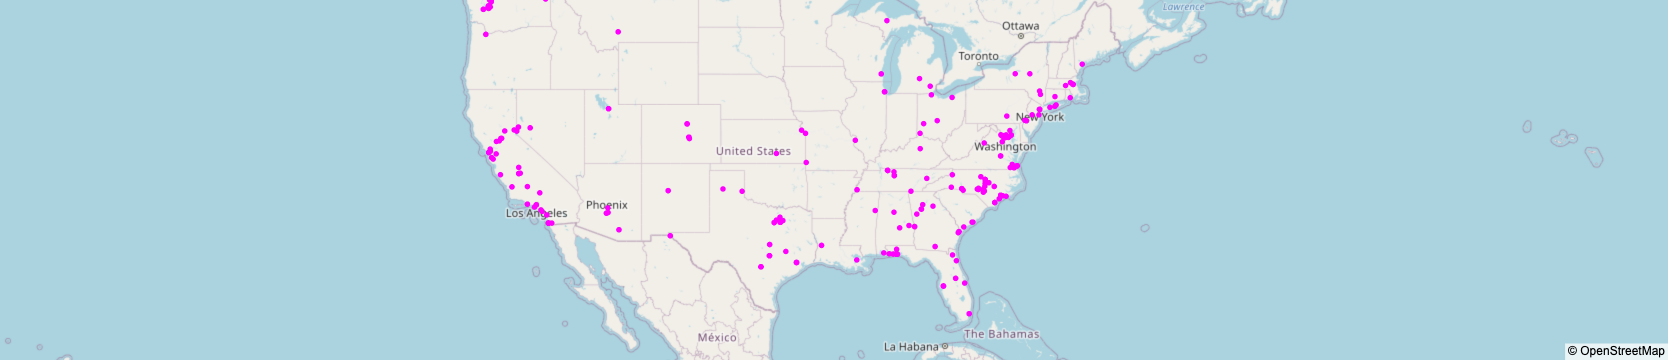

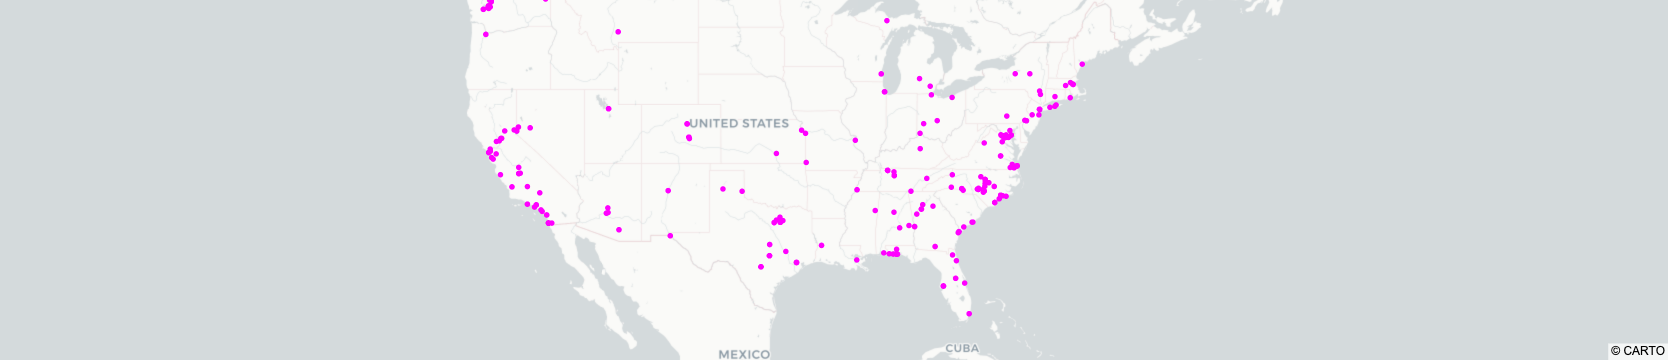

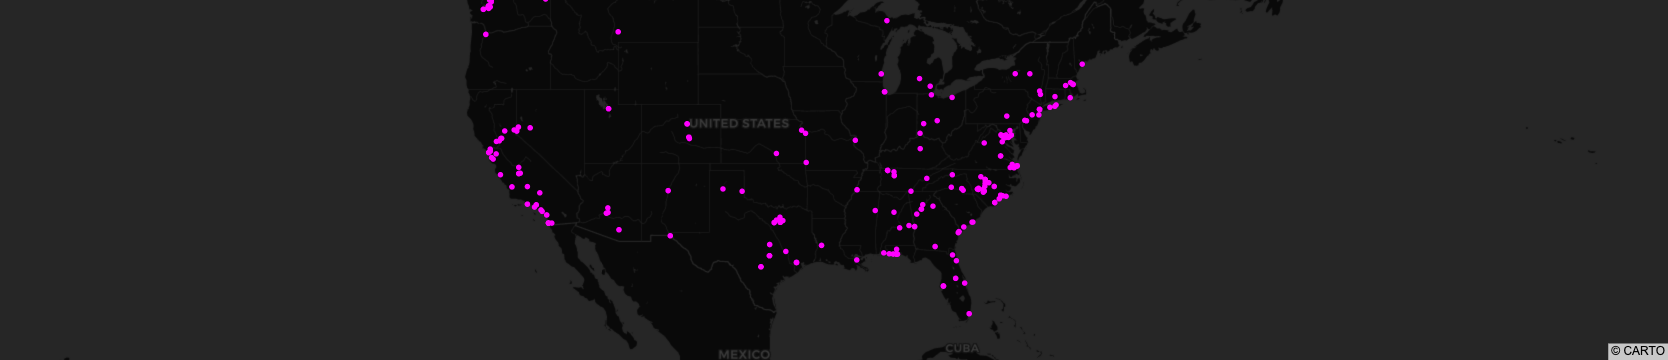

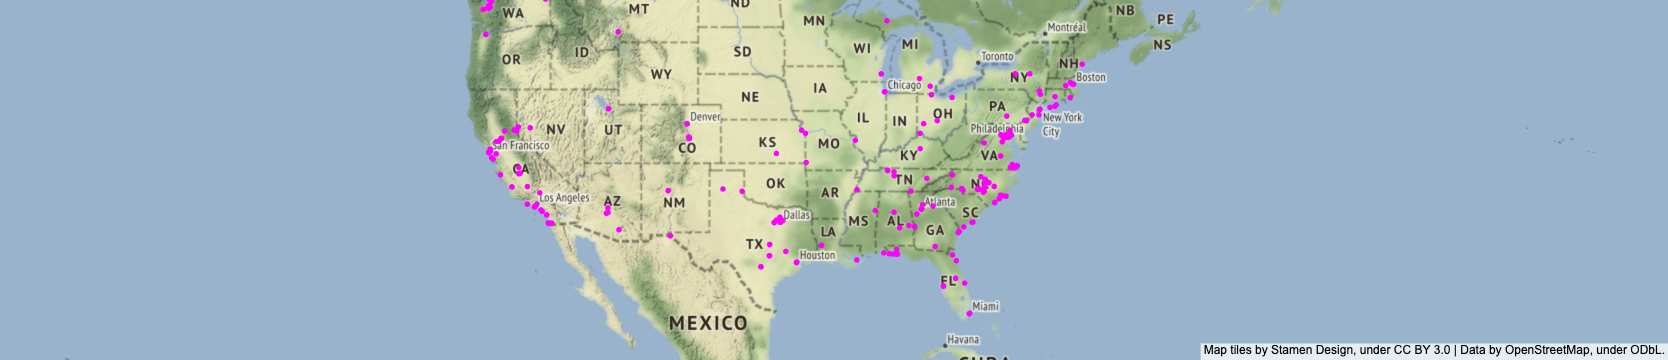

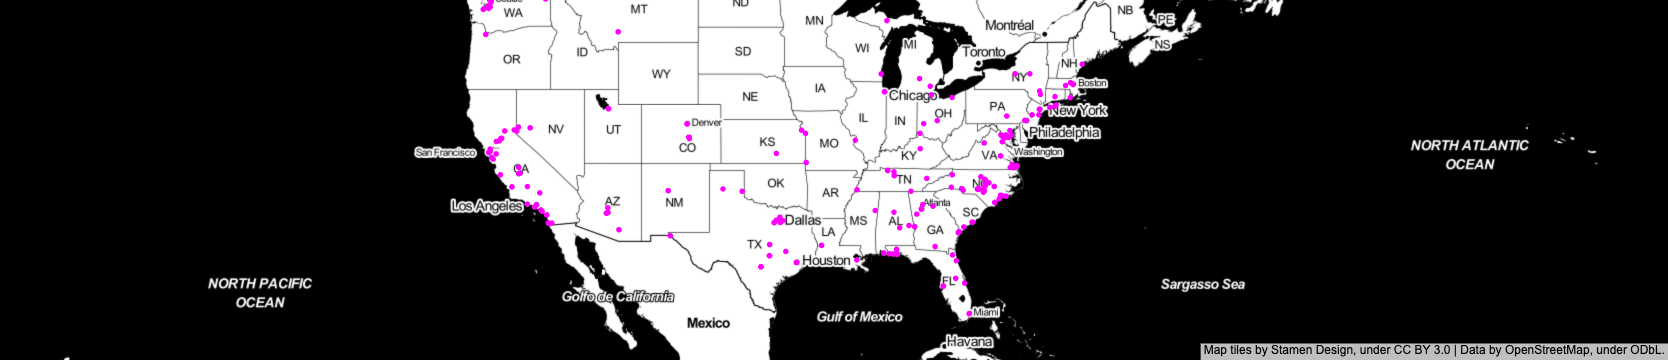

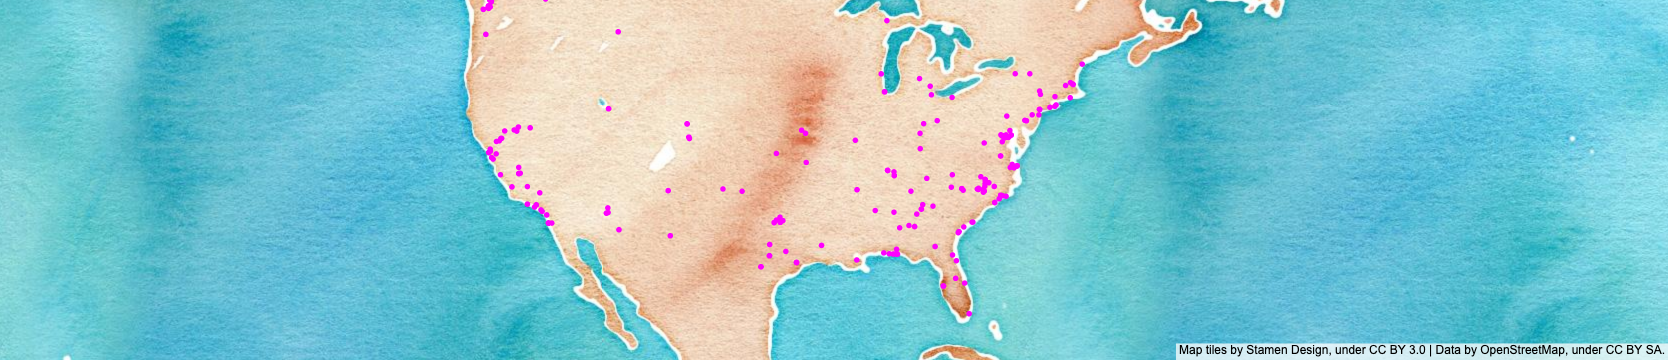

In [68]:
import plotly.express as px
import os

mapbox_access_token = os.environ.get('MAPBOX_API_KEY')
px.set_mapbox_access_token(mapbox_access_token)

map_types = ["open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner", "stamen-watercolor", 'light', 'dark']
for types in map_types:
    fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="CityState", #hover_data=["State", "Population"],
                            color_discrete_sequence=["fuchsia"], zoom=3, height=300)
    ful = fig.update_layout(mapbox_style=types)
    ful = fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

#### Barchart update info

In [ ]:
barchart.update_layout(
    autosize=False,
    width=800,
    height=600